In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

/Users/lianzou/miniconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
filename = os.path.join(os.getcwd(), "DataRes_DS1.txt")
df = pd.read_table(filename, low_memory=False, sep = ";")
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [3]:
df.shape

(2075259, 9)

In [4]:
df.drop(columns = ['Date', 'Time'], axis = 1, inplace = True)
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...
2075254,0.946,0.000,240.430,4.000,0.000,0.000,0.0
2075255,0.944,0.000,240.000,4.000,0.000,0.000,0.0
2075256,0.938,0.000,239.820,3.800,0.000,0.000,0.0
2075257,0.934,0.000,239.700,3.800,0.000,0.000,0.0


In [5]:
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...
2075254,0.946,0.000,240.430,4.000,0.000,0.000,0.0
2075255,0.944,0.000,240.000,4.000,0.000,0.000,0.0
2075256,0.938,0.000,239.820,3.800,0.000,0.000,0.0
2075257,0.934,0.000,239.700,3.800,0.000,0.000,0.0


In [6]:
df.drop(df[df['Global_active_power'] == '?'].index, inplace=True)
df.drop(df[df['Global_reactive_power'] == '?'].index, inplace=True)
df.drop(df[df['Voltage'] == '?'].index, inplace=True)
df.drop(df[df['Global_intensity'] == '?'].index, inplace=True)
df.drop(df[df['Sub_metering_1'] == '?'].index, inplace=True)
df.drop(df[df['Sub_metering_2'] == '?'].index, inplace=True)
df.drop(df[df['Sub_metering_3'] == '?'].index, inplace=True)

In [7]:
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...
2075254,0.946,0.000,240.430,4.000,0.000,0.000,0.0
2075255,0.944,0.000,240.000,4.000,0.000,0.000,0.0
2075256,0.938,0.000,239.820,3.800,0.000,0.000,0.0
2075257,0.934,0.000,239.700,3.800,0.000,0.000,0.0


In [8]:
df = df.apply(pd.to_numeric)

In [9]:
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2075254,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2075255,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2075256,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2075257,0.934,0.000,239.70,3.8,0.0,0.0,0.0


In [10]:
df = df.drop_duplicates()
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2075254,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2075255,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2075256,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2075257,0.934,0.000,239.70,3.8,0.0,0.0,0.0


In [11]:
train_y = df.loc[:,"Global_active_power"]
train_X = df.drop(columns = "Global_active_power")

In [12]:
print("Number of examples: " + str(train_X.shape[0]))
print("\nNumber of Features:" + str(train_X.shape[1]))
print(str(list(train_X.columns)))

Number of examples: 1906698

Number of Features:6
['Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']


In [13]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size=0.33, random_state=1234)

In [14]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

In [15]:
model = GradientBoostingRegressor(loss='squared_error',learning_rate=0.25)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [16]:
model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.25)

In [17]:
y_pred = model.predict(X_test)

In [18]:
model.score(X_train, y_train)

0.9988853884768871

In [19]:
model.score(X_test, y_test)

0.9988716106858915

In [20]:
from sklearn.metrics import mean_squared_error

In [21]:
mean_squared_error(y_test, y_pred)

0.0012877535919137608

In [22]:
rmse = mean_squared_error(y_test, y_pred)**(0.5)
rmse

0.035885283779200645

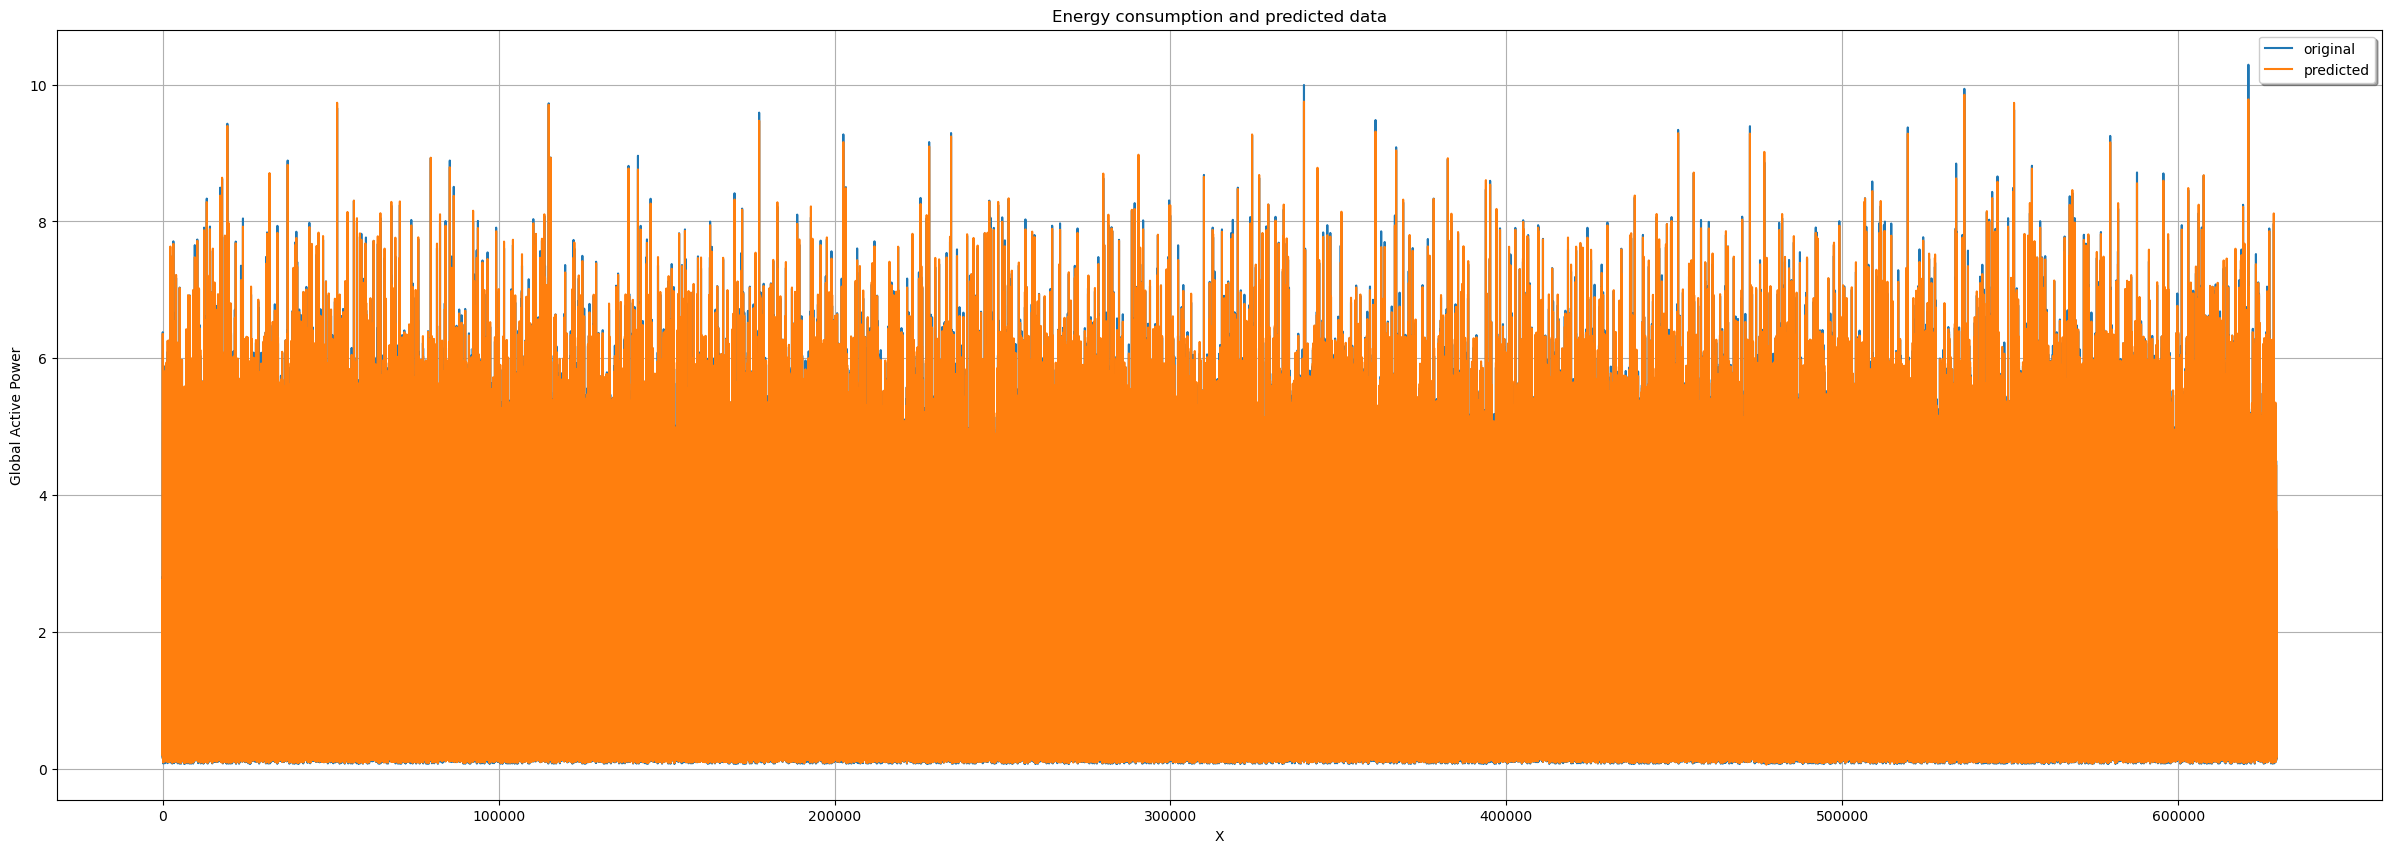

In [29]:
x_ax = range(len(y_test))
plt.figure(figsize=(30, 10))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Energy consumption and predicted data")
plt.xlabel('X')
plt.ylabel('Global Active Power')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 